In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#https://www.kaggle.com/datasets/nsrose7224/crowdedness-at-the-campus-gym

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [6]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [7]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [8]:
df["date"] = pd.to_datetime(df["date"], utc=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [10]:
df["year"] = df["date"].dt.year

In [11]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015


In [12]:
df["year"].unique()

array([2015, 2016, 2017], dtype=int32)

In [13]:
df.drop("date", axis=1, inplace=True)

In [59]:
#EDA

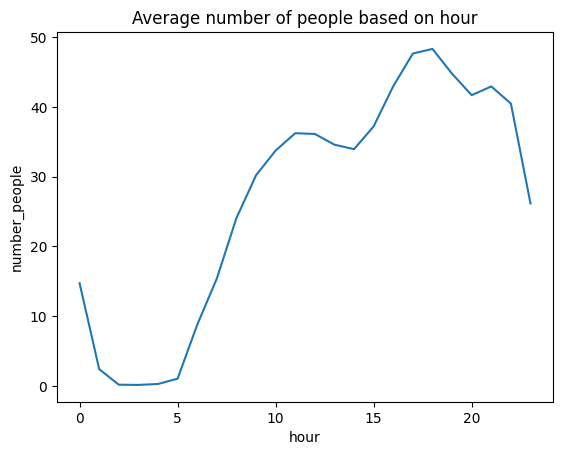

In [18]:
sns.lineplot(data=df, x="hour", y="number_people", errorbar=None)
plt.title("Average number of people based on hour")
plt.show()

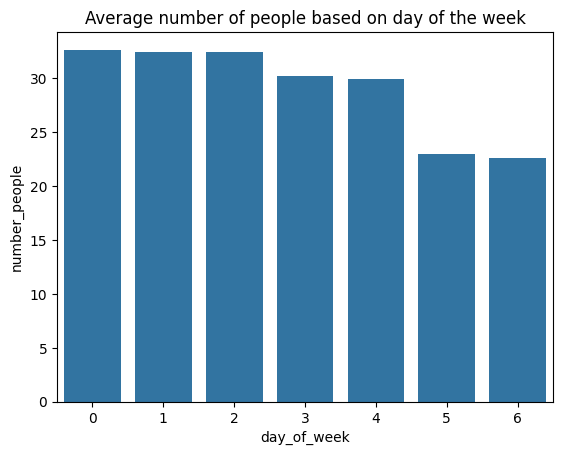

In [19]:
sns.barplot(data=df, x="day_of_week", y="number_people", errorbar=None)
plt.title("Average number of people based on day of the week")
plt.show()

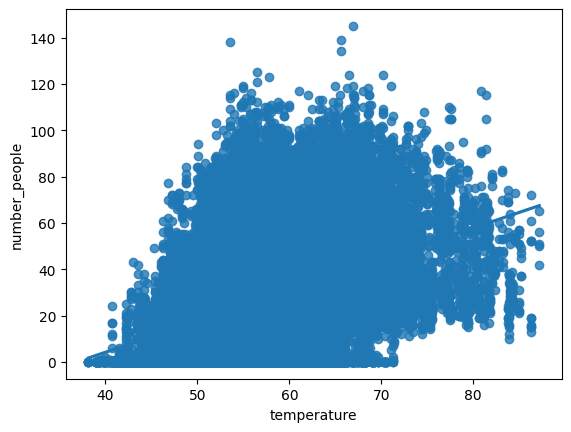

In [23]:
sns.regplot(data=df, x="temperature", y="number_people")
plt.show()

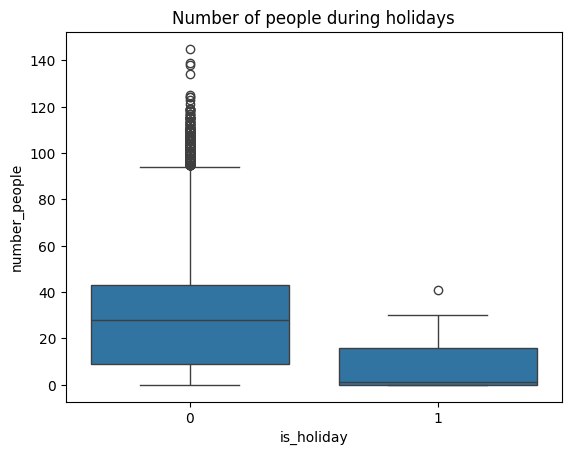

In [24]:
sns.boxplot(data=df, x="is_holiday", y="number_people")
plt.title("Number of people during holidays")
plt.show()

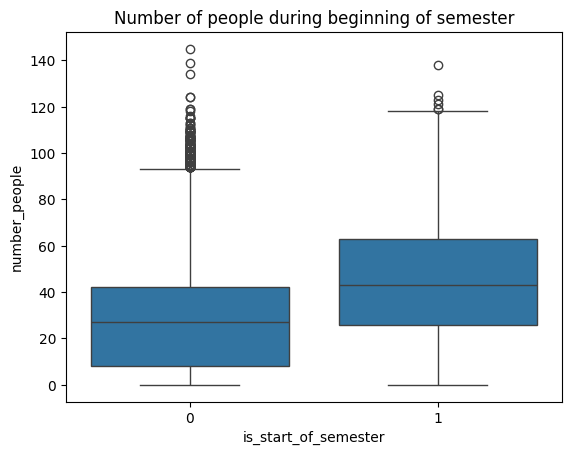

In [25]:
sns.boxplot(data=df, x="is_start_of_semester", y="number_people")
plt.title("Number of people during beginning of semester")
plt.show()

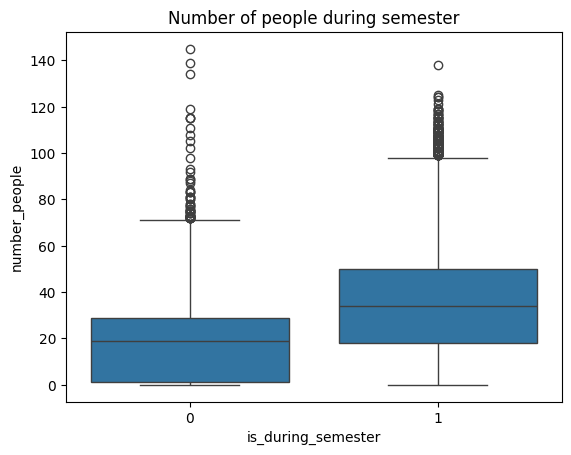

In [ ]:
sns.boxplot(data=df, x="is_during_semester", y="number_people")
plt.title("Number of people during semester")
plt.show()

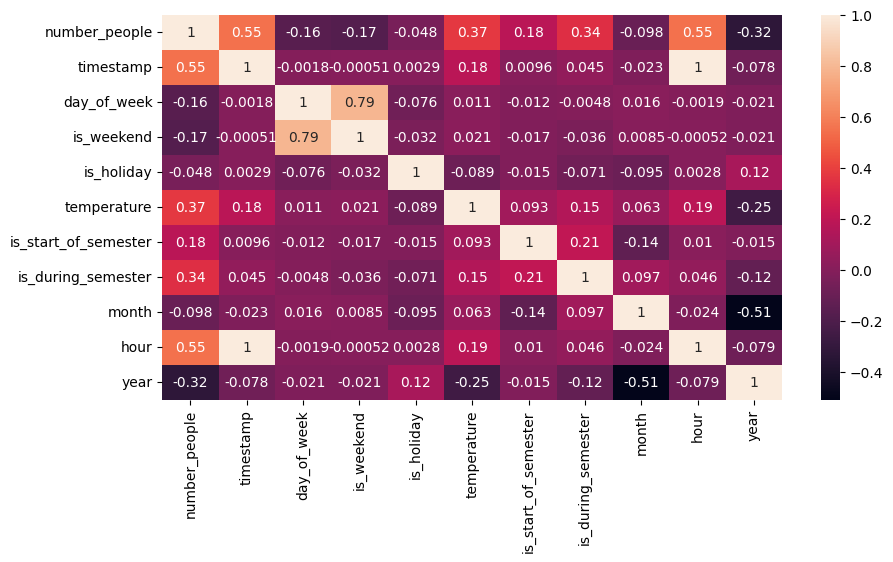

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
df.drop("timestamp", axis=1, inplace=True)

In [34]:
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,4,0,0,71.76,0,0,8,17,2015
1,45,4,0,0,71.76,0,0,8,17,2015
2,40,4,0,0,71.76,0,0,8,17,2015
3,44,4,0,0,71.76,0,0,8,17,2015
4,45,4,0,0,71.76,0,0,8,17,2015


In [60]:
#Splitting the data

In [35]:
X = df.drop("number_people", axis=1)

y = df["number_people"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.25)

In [61]:
#Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
#Testing multiple models

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def calculate_model_metrics(true, predicted):
    print("MAE:", mean_absolute_error(true, predicted))
    print("MSE:", mean_squared_error(true, predicted))
    print("RMSE:", np.sqrt(mean_squared_error(true, predicted)))
    print("R2 Score:", r2_score(true, predicted))

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [50]:
for i in range(len(list(models))):
    model = list(models.values())[i]

    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print(list(models.values())[i])

    print("\nTrain Prediction:")
    calculate_model_metrics(y_train, y_train_pred)

    print("\nTest Prediction:")
    calculate_model_metrics(y_test, y_pred)

    print("\n----------------\n")

LinearRegression()

Train Prediction:
MAE: 10.733469936454325
MSE: 205.1340179448865
RMSE: 14.322500408269727
R2 Score: 0.5999639521710998

Test Prediction:
MAE: 10.779752371029561
MSE: 208.8207913079756
RMSE: 14.45063290337055
R2 Score: 0.5989271376662774

----------------

Lasso()

Train Prediction:
MAE: 10.945189874221992
MSE: 212.25932608210303
RMSE: 14.569122351126818
R2 Score: 0.5860687429058036

Test Prediction:
MAE: 10.970594902476911
MSE: 216.19324207171786
RMSE: 14.703511215751082
R2 Score: 0.5847671974050241

----------------

Ridge()

Train Prediction:
MAE: 10.733479178820698
MSE: 205.13401810651635
RMSE: 14.322500413912243
R2 Score: 0.5999639518559021

Test Prediction:
MAE: 10.779759559023008
MSE: 208.82080363770297
RMSE: 14.450633329986024
R2 Score: 0.5989271139851151

----------------

KNeighborsRegressor()

Train Prediction:
MAE: 3.6423217119087434
MSE: 29.363218834426863
RMSE: 5.418783888883821
R2 Score: 0.9427381858370505

Test Prediction:
MAE: 4.815643895535829
MSE: 

In [63]:
#Hyperparameter tuning - Tuning the best performed models

In [52]:
knn_param_grid = {
    "n_neighbors": [2,3,10,20,40,50]
}

rf_param_grid = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [5,8,10,15,None],
    "max_features": ["sqrt", "log2", 5, 7, 10],
    "min_samples_split": [1, 8, 12, 15, 20]
}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
rscv_models  = [
    ("KNN", KNeighborsRegressor(), knn_param_grid),
    ("RF", RandomForestRegressor(), rf_param_grid)
      ]

In [55]:
for name, model, param_grid in rscv_models:
    rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=10)

    rscv.fit(X_train, y_train)

    print(f"Best Params({name}):", rscv.best_params_)

C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params(KNN): {'n_neighbors': 2}


C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 469, in _validate_params
    valid

Best Params(RF): {'n_estimators': 200, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': None}


In [56]:
#Best Params(KNN): {'n_neighbors': 2}
#Best Params(RF): {'n_estimators': 200, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': None}

In [57]:
models = {
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=2),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=8, max_features="log2", max_depth=None)
}

In [58]:
for i in range(len(list(models))):
    model = list(models.values())[i]

    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print(list(models.values())[i])

    print("\nTrain Prediction:")
    calculate_model_metrics(y_train, y_train_pred)

    print("\nTest Prediction:")
    calculate_model_metrics(y_test, y_pred)

    print("\n----------------\n")

KNeighborsRegressor(n_neighbors=2)

Train Prediction:
MAE: 3.554365538830996
MSE: 29.810674771645438
RMSE: 5.459915271471292
R2 Score: 0.9418655928537132

Test Prediction:
MAE: 4.6316737424417855
MSE: 47.63064453878811
RMSE: 6.901495818935785
R2 Score: 0.9085179266857696

----------------

RandomForestRegressor(max_features='log2', min_samples_split=8,
                      n_estimators=200)

Train Prediction:
MAE: 3.4942852517107745
MSE: 25.858665756171867
RMSE: 5.085141665300178
R2 Score: 0.9495724865389866

Test Prediction:
MAE: 4.4095453079212
MSE: 42.489596517487215
RMSE: 6.518404445682027
R2 Score: 0.9183921103452752

----------------

